# Wilson-Cowan Model and Firing Rate Dynamics

## 1. Wilson-Cowan Model

# a-c) Graphing phase plane and time series evolution of system with E and I nullclines

In [35]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(1337)

In [36]:
def sigmoid(x, gain=3, threshold=1):
    """Transfer Function for WC Model"""
    return (1 / (1 + np.exp(-gain*(x - threshold))))


def drdt(
    r,
    w_ee=6.4,
    w_ei=-4.8,
    w_ie=6,
    w_ii=-1.2,
    tau_e=1,
    tau_i=2,
    I_e=0.8,
    I_i=0,
    gain_e=1.2,
    gain_i=1,
    theta_e=2.8,
    theta_i=4,
):
    """Dynamics of WC Model"""
    re, ri = r
    dredt = (-re + sigmoid(w_ee*re + w_ei*ri+I_e, gain=gain_e, threshold=theta_e)) / tau_e
    dridt = (-ri + sigmoid(w_ie*re + w_ii*ri+I_i, gain=gain_i, threshold=theta_i)) / tau_i
    return np.array([dredt, dridt], dtype=np.float64)


def E_nullcline(r,
    w_ee=6.4,
    w_ei=-4.8,
    w_ie=6,
    w_ii=-1.2,
    tau_e=1,
    tau_i=2,
    I_e=0.8,
    I_i=0,
    gain_e=1.2,
    gain_i=1,
    theta_e=2.8,
    theta_i=4,):
    """Returns the nullcline values for drE/dt = 0 as a function of rE"""
    # For values of RE return values of RI
    return (theta_e - w_ee*r - I_e - (1/gain_e)*np.log((1-r)/r)) / w_ei


def I_nullcline(r,
    w_ee=6.4,
    w_ei=-4.8,
    w_ie=6,
    w_ii=-1.2,
    tau_e=1,
    tau_i=2,
    I_e=0.8,
    I_i=0,
    gain_e=1.2,
    gain_i=1,
    theta_e=2.8,
    theta_i=4,):
    """Returns the nullcline values for drI/dt = 0 as a function of rI"""
    # For values of RI, return values of RE
    return (theta_i - w_ii*r - I_i - (1/gain_i)*np.log((1-r)/r)) / w_ie


def dir_field(
    N=20,
    w_ee=6.4,
    w_ei=-4.8,
    w_ie=6,
    w_ii=-1.2,
    tau_e=1,
    tau_i=2,
    I_e=0.8,
    I_i=0,
    gain_e=1.2,
    gain_i=1,
    theta_e=2.8,
    theta_i=4,
):
    """Returns direction field, the local dynamics at each point of some grid in phase space"""
    # Use meshgrid to create a [0,1] by [0,1], NxN grid
    RE, RI = np.meshgrid(np.linspace(0, 1, N), np.linspace(0, 1, N))

    # Determine the rate of change in the RE direction at all points
    dRE = (
        -RE + sigmoid(w_ee * RE + w_ei * RI + I_e, gain=gain_e, threshold=theta_e)
    ) / tau_e

    # Determine the rate of change in the RI direciton at all points
    dRI = (
        -RI + sigmoid(w_ie * RE + w_ii * RI + I_i, gain=gain_i, threshold=theta_i)
    ) / tau_i

    # Normalize the rate of change
    d_norm = np.sqrt(dRE**2 + dRI**2)

    # Return the gride spacing by the meshgrid and the normalized rate of change in RE and RI
    return RE, RI, dRE / d_norm, dRI / d_norm

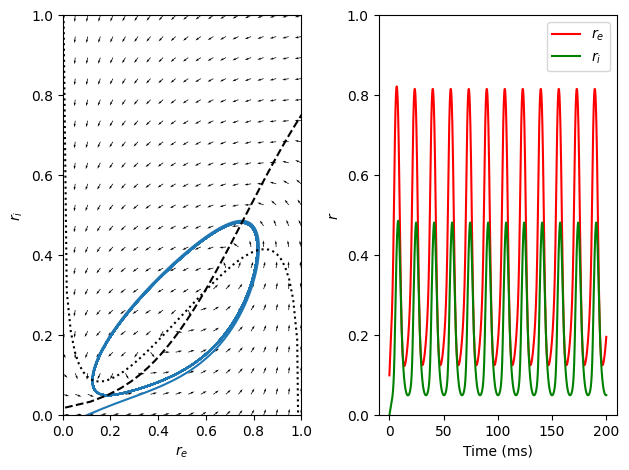

In [37]:
# set up the WC system with the appropriate parameters
w_ee = 6.4
w_ei = -4.8
w_ie = 6
w_ii = -1.2
tau_e = 1
tau_i = 2
I_e = 0.8
I_i = 0
gain_e = 1.2
gain_i = 1
theta_e = 2.8
theta_i = 4

def wilsoncowan():
    """
    Creates two plot showing the wilson-cowan system
    """
    T = 200
    dt = 0.1
    time = np.arange(0, T + dt, dt)
    r_vals = np.zeros((time.shape[0], 2))
    r_vals[0] = np.asarray([0.1, 0])
    # Simulate the WC system
    for i in range(1, time.shape[0]):
        # Forward Euler using drdt
        drdt_vals = drdt((r_vals[i-1,0],r_vals[i-1,1]), I_e=I_e)
        # print(drdt_vals)
        r_vals[i] = r_vals[i-1] + dt*drdt_vals
        # r_vals[i] = [r_vals[i-1,0] + d*dt, r_vals[i-1,1] + dridt*dt]

    # Determine the nullclines
    # Use r_null as the input R value for the nullclines
    # Then how would you plot it?
    # avoid the divide by zero error
    r_null = np.linspace(0.0001, 0.9999, 60)
    I_nullcline_ys = I_nullcline(r_null, I_e=I_e)
    E_nullcline_ys = E_nullcline(r_null, I_e=I_e)
    # I_nullcline_ys = [I_nullcline(r) for r in r_null]
    # E_nullcline_ys = [E_nullcline(r) for r in r_null]

    # Determine the direction field
    RE, RI, dRE, dRI = dir_field(I_e=I_e)

    fig, ax = plt.subplots(1, 2, tight_layout=True)
    # Plot trajectory
    ax[0].plot(r_vals[:,0], r_vals[:,1])

    # Plot E nullcline
    ax[0].plot(r_null, E_nullcline_ys, color="k", ls=":")

    # Plot I nullcline (set color to "k" and ls="--")
    ax[0].plot(I_nullcline_ys, r_null, color="k", ls="--")

    # Plot direction field (nothing to change here assuming dir_field is correct)
    ax[0].quiver(RE, RI, dRE, dRI)

    # Plot time series of r_e(t) and r_i(t) on second axis
    ax[1].plot(time, r_vals[:,0], color="r", label='$r_e$')
    ax[1].plot(time, r_vals[:,1], color="g", label="$r_i$")


    ### NO NEED TO EDIT ANYTHING BELOW HERE ####
    # Label and set plot limits
    ax[0].set_ylim([0, 1])
    ax[0].set_xlim([0, 1])
    ax[0].set_xlabel("$r_e$")
    ax[0].set_ylabel("$r_i$")

    # Label and set plot limits
    ax[1].set_ylim([0, 1])
    ax[1].set_ylabel("$r$")
    ax[1].legend();
    ax[1].set_xlabel("Time (ms)")

    plt.show()
wilsoncowan()

## d) Interpreting nullcline intersection
Where the nullclines intersect, both $\frac{dr_e}{dt}$ and $\frac{dr_i}{dt}$ are zero so the system is stable and neither the rate of the excitatory population or the inhibitory population is changing at that point. The direction field is zero at this point.

## e) Changing external current to excitatory population

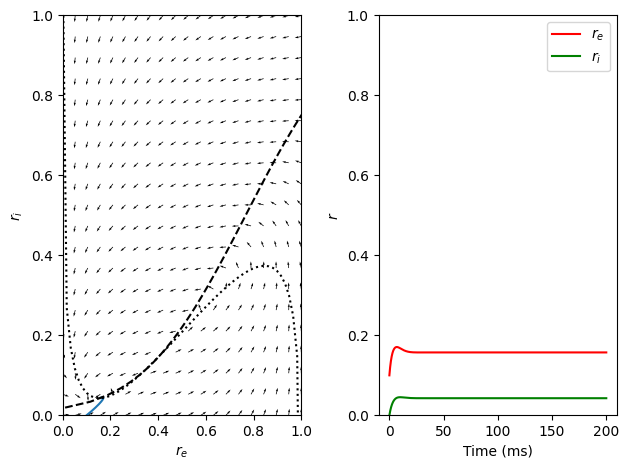

In [38]:
I_e = 0.6
wilsoncowan()

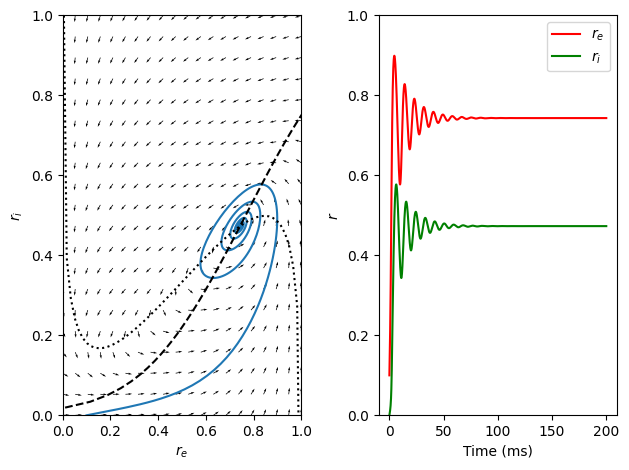

In [39]:
I_e = 1.2
wilsoncowan()

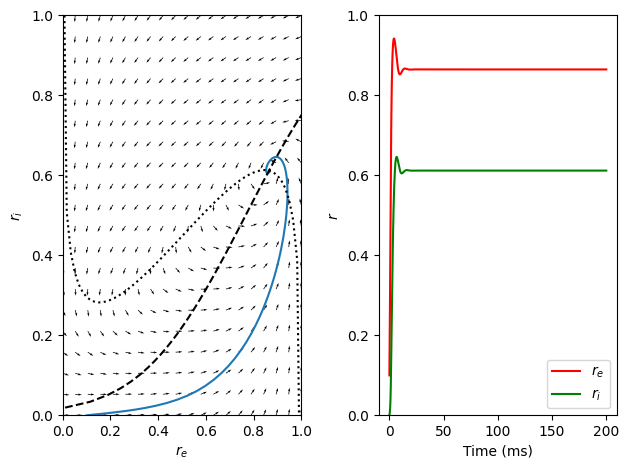

In [40]:
I_e = 1.75
wilsoncowan()

When $I_e = 0.6$, the direction field circles around the part of the curve where the nullclines intersect, and the solution falls rapidly into stability. When $I_e = 1.2$, the direction field circles around the single point attractor present where the nullclines intersect, and the solution eventually falls into the point of intersection. When $I_e = 1.75$, the direction field shows a much tighter circle around the point of intersection and the solution falls in to that point quickly, without many of the dampened loops we saw when $I_e$ was 1.2. With regards to stability, the graphs of $r_e$ and $r_i$ over time when $I_e$ takes the value of 1.75 and 0.6 show us the system becomes stable within the first 25ms while at 1.2 the system takes about 75ms to finally become stabele. Therefore, the fixed points of the first and third graph are more stable than the fixed point of the middle graph.

## f) Stability analysis with respect to $I_e$

In [52]:
import scipy

I_es = np.arange(0,2,0.01)
peaks = []
troughs = []
for i in range(len(I_es)):
    I_e = I_es[i]
    T = 200
    dt = 0.1
    time = np.arange(0, T + dt, dt)
    r_vals = np.zeros((time.shape[0], 2))
    r_vals[0] = np.asarray([0.1, 0])
    # Simulate the WC system
    for i in range(1, time.shape[0]):
        # Forward Euler using drdt
        drdt_vals = drdt((r_vals[i-1,0],r_vals[i-1,1]), I_e=I_e)
        # print(drdt_vals)
        r_vals[i] = r_vals[i-1] + dt*drdt_vals

    # throw out transient behavior by only including second half
    r_es = r_vals[time.shape[0]//2:,0]
    r_is = r_vals[time.shape[0]//2:,1]

    peak, _ = scipy.signal.find_peaks(r_es)
    trough, _ = scipy.signal.find_peaks(-1 * r_es)

    if len(peak) == 0:
        peak = np.max(r_es)
        peaks.append(peak)
    else:
        peaks.append(r_es[peak])

    if len(trough) == 0:
        trough = np.min(r_es)
        troughs.append(trough)
    else:
        troughs.append(r_es[trough])

In [53]:
# plot peaks and troughs against I_e
def getExpanded(peaks):
    """
    Generate arrays for plotting mutliple y values for one x vale

    Parameters:
    -----------
    peaks: list
        Elements are either a scalar or an array of peak values
    
    Returns:
    --------
    (list, list)
        List of x values, List of y values representing the points
    """
    x_expanded = []
    peaks_expanded = []

    for x, y in zip(I_es, peaks):
        if np.isscalar(y):
            x_expanded.append(x)
            peaks_expanded.append(y)
        else:
            x_expanded.extend([x] * len(y))
            peaks_expanded.extend(y)
    return x_expanded, peaks_expanded
x_expanded, peaks_expanded = getExpanded(peaks)
x_expanded_2, troughs_expanded = getExpanded(troughs)

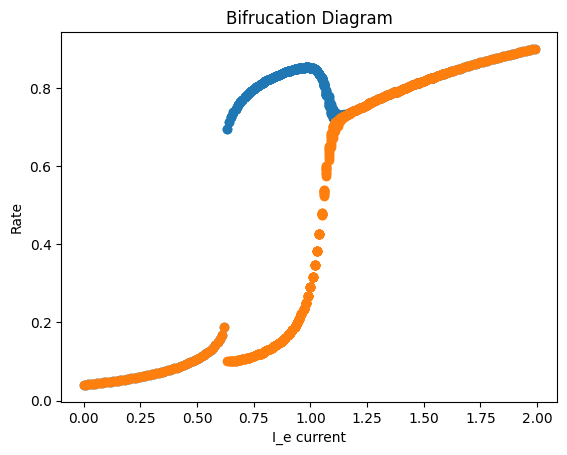

In [56]:
plt.scatter(x_expanded, peaks_expanded)
plt.scatter(x_expanded_2, troughs_expanded)
plt.xlabel("I_e current");
plt.ylabel("Rate");
plt.title("Bifrucation Diagram");


In [ ]:
# further investigation
from ipywidgets import interact, FloatSlider
def plotgraph(i_e):
    global I_e
    I_e = i_e
    wilsoncowan()

interact(plotgraph, i_e=FloatSlider(value=0.5, min=0.0, max=2.0, step=0.1));

interactive(children=(FloatSlider(value=0.5, description='i_e', max=2.0), Output()), _dom_classes=('widget-int…

## 2. Simple Firing Rate Dynamics

$\tau \frac{dr}{dt} = -r+f(\alpha r + I_{ext})$


$\tau=10$, $I_{ext}=0.5$, $a=6$, $\theta=1$

## a) Visualizing a bi-stable region of final rates starting from either low or high initial condition for different values of recurrent connection strength alpha.

In [45]:
dt = 0.1
T = 200
I_ext = 0.5
alphas = np.linspace(0,2,200)
small_init = 0.01
large_init = 0.99
rsfinals = []
rlfinals = []
for i in range(len(alphas)):
    alpha = alphas[i]
    rs = small_init
    rl = large_init
    for j in range(int(T/dt)):
        rs += (-rs + sigmoid(alpha*rs + I_ext, gain=6, threshold=1)) / 10
        rl += (-rl + sigmoid(alpha*rl + I_ext, gain=6, threshold=1)) / 10
    rsfinals.append(rs)
    rlfinals.append(rl)

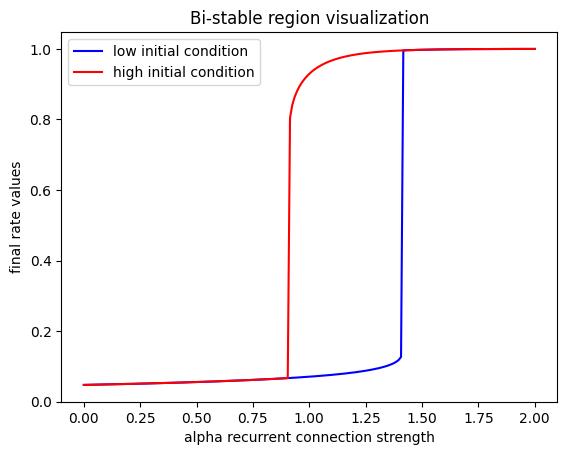

In [46]:
# plot the final values of r for each recurrent connection strength
plt.plot(alphas, rsfinals, color='blue', label='low initial condition')
plt.plot(alphas, rlfinals, color='red', label='high initial condition')
plt.xlabel("alpha recurrent connection strength")
plt.ylabel("final rate values")
plt.title("Bi-stable region visualization");
plt.legend();

## b) Basins of attraction in the bi-stable region

In [47]:
alpha = 1.15
r_0 = np.linspace(0,1,60)
final_rates = np.zeros(r_0.shape)

# simulate the system
for i in range(len(r_0)):
    r = r_0[i]
    for j in range(int(T/dt)):
        r += (-r + sigmoid(alpha*r + I_ext, gain=6, threshold=1)) / 10
    final_rates[i] = r

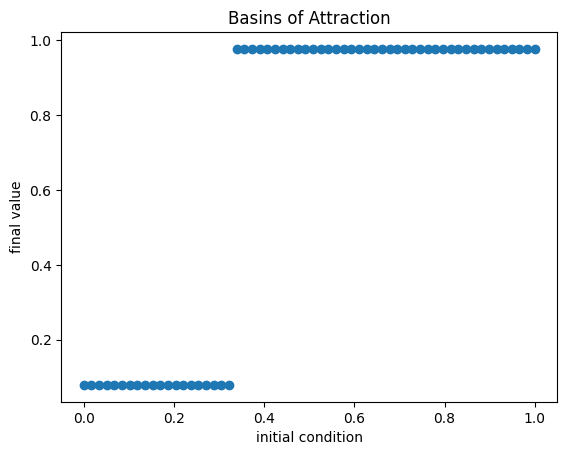

In [48]:
plt.scatter(r_0, final_rates)
plt.xlabel("initial condition")
plt.ylabel("final value")
plt.title("Basins of Attraction");

## c) Finding where $\frac{dr}{dt}=0$ for the $\alpha$ used above.

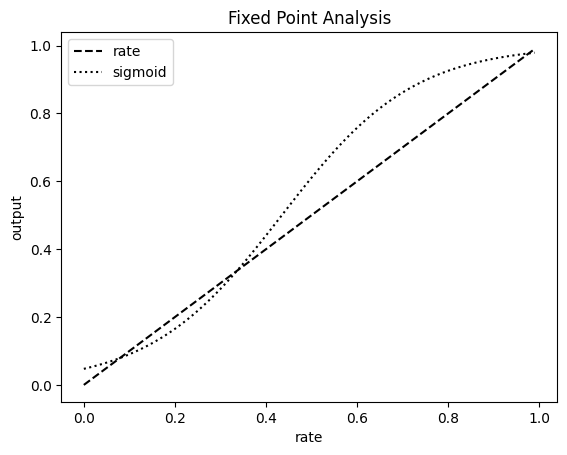

In [49]:
rs = np.arange(0,1,0.01)
sigmoids = [sigmoid(alpha * r + I_ext, gain=6, threshold=1) for r in rs]
plt.plot(rs, rs, color='k', ls='--', label='rate')
plt.plot(rs, sigmoids, color='k', ls=':', label='sigmoid')
plt.xlabel("rate")
plt.ylabel("output")
plt.legend();
plt.title("Fixed Point Analysis");

The stable intersections are the first and last intersections. I know this because a deviation lower in rate from these two points leads to the sigmoid transfer function becoming higher than the rate, which mades the next step in the simulation increase the rate of the neuron because $\frac{dr}{dt} = -r + f(\alpha r + I_{ext})$, therefore pushing it back to the stable point. And if the rate deviates upward, we get a similar feedback effect that pushes the rate downward because now the transfer function is less than the rate. These inequalities are inverted for the middle point so the equilibrium is unstable. For example, if the rate at the middle point decreases slightly, the rate will keep decreasing because the transfer function is less than the rate.